In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Paths

In [6]:
data_dir = "/home/nikhil/projects/brain_changes/data/ukbb/"

tab_follow_up_csv = f"{data_dir}tabular/tab_follow_up.csv"
brain_age_csv = f"{data_dir}/results/brain-age_ukbb-followup_ses-2_SFCN-run-1_results.csv"


## Read results

In [21]:
ukbb_tab_followup_df = pd.read_csv(tab_follow_up_csv)
ukbb_tab_followup_df = ukbb_tab_followup_df.reset_index()
brain_age_df = pd.read_csv(brain_age_csv)

subject_success = list(brain_age_df[brain_age_df["pred"]!=-1].index)

print(f"Number of successful predictions: {len(subject_success)} out of {len(brain_age_df)}")

brain_age_df = brain_age_df[brain_age_df["pred"]!=-1]
brain_age_df = pd.merge(brain_age_df, ukbb_tab_followup_df, on="eid", how="left")

print(f"Number of brain-age subjects: {len(brain_age_df)}")

brain_age_df.head()

Number of successful predictions: 1427 out of 1427
Number of brain-age subjects: 1427


,Unnamed: 0,eid,pred,prob,index,sex,birth_year,T1-ses2,T1-ses3,ethnicity,age_at_ses2,age_at_ses3,age_at_recruitment
0,0,1004084,66.834612,[0.00090773 0.00093408 0.00098936 0.00085202 0...,0,1.0,1947.0,20252_2_0,20252_3_0,1001.0,70.0,72.0,60.0
1,1,1010063,52.458433,[2.85410097e-05 4.52067616e-05 2.40045178e-04 ...,1,0.0,1964.0,20252_2_0,20252_3_0,1001.0,53.0,55.0,45.0
2,3,1014782,61.505157,[2.0425497e-04 2.2044049e-04 2.6866587e-04 2.3...,3,1.0,1947.0,20252_2_0,20252_3_0,1001.0,70.0,72.0,61.0
3,4,1016215,65.544100,[2.03753036e-04 2.05709584e-04 1.98428897e-04 ...,4,1.0,1951.0,20252_2_0,20252_3_0,1001.0,65.0,67.0,56.0
4,6,1022531,65.136880,[0.00093911 0.00100203 0.00120763 0.001233 0...,6,1.0,1951.0,20252_2_0,20252_3_0,1001.0,66.0,68.0,58.0


## Compute performance

In [37]:
## MAE
y_true = brain_age_df["age_at_ses2"]
y_pred = brain_age_df["pred"]

abs_err = np.abs(y_pred - y_true)

brain_age_df["abs_err"] = abs_err
MAE = np.mean(abs_err)
std_AE = np.std(abs_err)

corr = stats.pearsonr(y_true, y_pred)

print(f"MAE = {MAE:3.2f} (std = {std_AE:3.2f})\n Pearsons r= {corr}")

MAE = 4.13 (std = 2.85)
 Pearsons r= (0.8981622580389089, 0.0)


## Plots

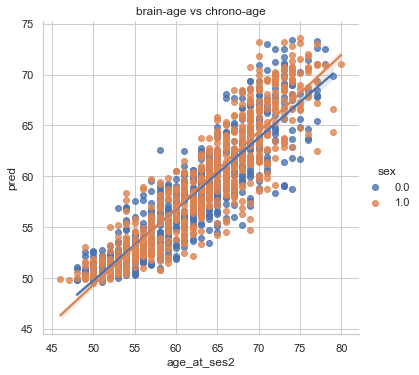

In [30]:
plot_df = brain_age_df.copy()
palette = 'husl'
sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.lmplot(x="age_at_ses2", y="pred", hue="sex",data=plot_df)
    plt.title("brain-age vs chrono-age")

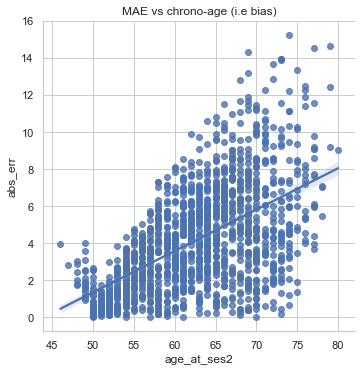

In [31]:
plot_df = brain_age_df.copy()
palette = 'husl'
sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.lmplot(x="age_at_ses2", y="abs_err", data=plot_df)
    plt.title("MAE vs chrono-age (i.e bias)")